In [ ]:
### Consider Red v Blue states 

In [ ]:
import patsy 
from sklearn.linear_model import LogisticRegression


In [140]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [21]:
opioids = pd.read_csv('opioids.csv')
overdose = pd.read_csv('overdoses.csv')
doctor = pd.read_csv('prescriber-info.csv')

In [22]:
opioids.head()

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN


In [42]:
opioids

,Drug Name,Generic Name
0,ABSTRAL,FENTANYL CITRATE
1,ACETAMINOPHEN-CODEINE,ACETAMINOPHEN WITH CODEINE
2,ACTIQ,FENTANYL CITRATE
3,ASCOMP WITH CODEINE,CODEINE/BUTALBITAL/ASA/CAFFEIN
4,ASPIRIN-CAFFEINE-DIHYDROCODEIN,DIHYDROCODEINE/ASPIRIN/CAFFEIN
5,AVINZA,MORPHINE SULFATE
6,BELLADONNA-OPIUM,OPIUM/BELLADONNA ALKALOIDS
7,BUPRENORPHINE HCL,BUPRENORPHINE HCL
8,BUTALB-ACETAMINOPH-CAFF-CODEIN,BUTALBIT/ACETAMIN/CAFF/CODEINE
9,BUTALB-CAFF-ACETAMINOPH-CODEIN,BUTALBIT/ACETAMIN/CAFF/CODEINE


In [23]:
overdose.head()

,State,Population,Deaths,Abbrev
0,Alabama,"4,833,722",723,AL
1,Alaska,"735,132",124,AK
2,Arizona,"6,626,624","1,211",AZ
3,Arkansas,"2,959,373",356,AR
4,California,"38,332,521","4,521",CA


In [16]:
def float_converter(x):
    x = x.replace(",","")
    x = float(x)
    return x

In [25]:
overdose["Population"] = overdose['Population'].apply(float_converter)

In [27]:
overdose["Deaths"] = overdose["Deaths"].apply(float_converter)

In [28]:
overdose.head()

,State,Population,Deaths,Abbrev
0,Alabama,4833722.0,723.0,AL
1,Alaska,735132.0,124.0,AK
2,Arizona,6626624.0,1211.0,AZ
3,Arkansas,2959373.0,356.0,AR
4,California,38332521.0,4521.0,CA


In [29]:
overdose['Ratio'] = overdose["Deaths"]/overdose["Population"]

(array([  4.,   5.,  14.,   7.,  10.,   4.,   4.,   1.,   0.,   1.]),
 array([  5.94421013e-05,   8.73111171e-05,   1.15180133e-04,
          1.43049149e-04,   1.70918164e-04,   1.98787180e-04,
          2.26656196e-04,   2.54525212e-04,   2.82394227e-04,
          3.10263243e-04,   3.38132259e-04]),
 <a list of 10 Patch objects>)

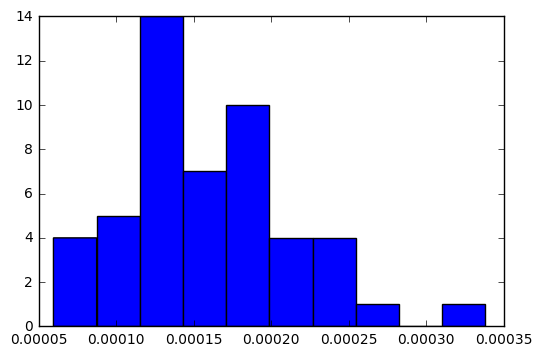

In [34]:
plt.hist(overdose["Ratio"])

In [35]:
overdose[overdose["Ratio"] == overdose["Ratio"].max()]

,State,Population,Deaths,Abbrev,Ratio
47,West Virginia,1854304.0,627.0,WV,0.000338


In [87]:
overdose[overdose["Ratio"] == overdose["Ratio"].min()]

,State,Population,Deaths,Abbrev,Ratio
33,North Dakota,723393.0,43.0,ND,0.000059


In [89]:
overdose["Ratio"].sum() / len(overdose["Ratio"])

0.00015943673212099403

In [90]:
overdose[overdose["Ratio"] < 0.00015943673212099403]

,State,Population,Deaths,Abbrev,Ratio
0,Alabama,4833722.0,723.0,AL,0.000150
3,Arkansas,2959373.0,356.0,AR,0.000120
4,California,38332521.0,4521.0,CA,0.000118
8,Florida,19552860.0,2634.0,FL,0.000135
9,Georgia,9992167.0,1206.0,GA,0.000121
10,Hawaii,1404054.0,157.0,HI,0.000112
11,Idaho,1612136.0,212.0,ID,0.000132
12,Illinois,12882135.0,1705.0,IL,0.000132
14,Iowa,3090416.0,264.0,IA,0.000085
15,Kansas,2893957.0,332.0,KS,0.000115


In [142]:
overdose['Ratio'].describe()

count    50.000000
mean      0.000159
std       0.000055
min       0.000059
25%       0.000120
50%       0.000149
75%       0.000191
max       0.000338
Name: Ratio, dtype: float64

In [143]:
overdose[overdose["Ratio"] > 0.000191]  #states above 75th percentile for overdose deaths 

,State,Population,Deaths,Abbrev,Ratio
7,Delaware,925749.0,189.0,DE,0.000204
16,Kentucky,4395295.0,1077.0,KY,0.000245
20,Massachusetts,6692824.0,1289.0,MA,0.000193
27,Nevada,2790136.0,545.0,NV,0.000195
28,New Hampshire,1323459.0,334.0,NH,0.000252
30,New Mexico,2085287.0,547.0,NM,0.000262
34,Ohio,11570808.0,2744.0,OH,0.000237
35,Oklahoma,3850568.0,777.0,OK,0.000202
37,Pennsylvania,12773801.0,2732.0,PA,0.000214
38,Rhode Island,1051511.0,247.0,RI,0.000235


In [36]:
doctor.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [44]:
len(doctor.columns.tolist())

256

In [61]:
cols_to_sum = doctor.ix[:,5:255].columns.tolist()

In [64]:
#doctor['total_prescribed'] = np.sum(doctor[cols_to_sum])

In [71]:
sum(doctor.ix[5,cols_to_sum])

25

In [81]:
times_prescribed = []

for x in cols_to_sum:
    times_prescribed.append(sum(doctor[x]))


In [83]:
#drug_counts = zip(cols_to_sum,times_prescribed)

In [121]:
drug_counts[1].sum() / len(drug_counts)

138305

In [118]:
drug_counts = pd.DataFrame(drug_counts)

In [122]:
drug_counts[drug_counts[1] > 600000]

,0,1
10,AMLODIPINE.BESYLATE,1107865
16,ATORVASTATIN.CALCIUM,988910
88,FUROSEMIDE,828161
89,GABAPENTIN,654491
100,HYDROCODONE.ACETAMINOPHEN,958082
128,LEVOTHYROXINE.SODIUM,1144724
130,LISINOPRIL,1176243
142,METFORMIN.HCL,715162
151,METOPROLOL.TARTRATE,657013
174,OMEPRAZOLE,1012238


(array([ 180.,   36.,   11.,    8.,    4.,    2.,    1.,    1.,    4.,    3.]),
 array([   12563.,   128931.,   245299.,   361667.,   478035.,   594403.,
          710771.,   827139.,   943507.,  1059875.,  1176243.]),
 <a list of 10 Patch objects>)

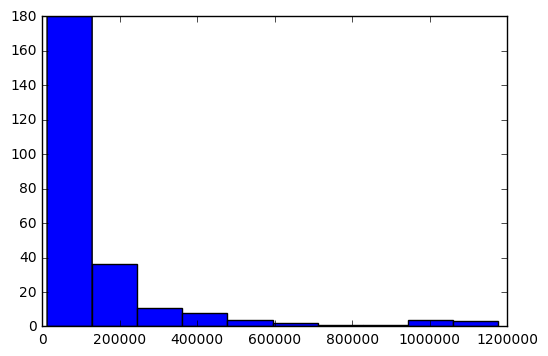

In [117]:
plt.hist(pd.DataFrame(drug_counts)[1])

In [86]:
max(drug_counts)  #ZOLPIDEM.TARTRATE is the most prescribed 

('ZOLPIDEM.TARTRATE', 289328)

In [123]:
#df['e'] = df[col_list].sum(axis=1)
doctor['total_prescribed'] = doctor[cols_to_sum].sum(axis=1)

In [105]:
def row_sum(df,column_list):
    for row in range(len(df)):
        for x in df.ix[row,column_list]:
            return sum(x)
    
    

In [106]:
len(doctor)

25000

In [124]:
doctor.head(2)

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,total_prescribed
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,29
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,35,1,1418


In [139]:
doctor[doctor['total_prescribed'] == 10428]

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,total_prescribed
16529,1194755983,M,NY,MD,Internal Medicine,0,0,16,49,0,...,35,59,21,122,12,249,0,166,1,10428


In [98]:
doctor.ix[90,cols_to_sum]

ABILIFY                            0
ACETAMINOPHEN.CODEINE              0
ACYCLOVIR                          0
ADVAIR.DISKUS                      0
AGGRENOX                           0
ALENDRONATE.SODIUM                 0
ALLOPURINOL                        0
ALPRAZOLAM                         0
AMIODARONE.HCL                     0
AMITRIPTYLINE.HCL                  0
AMLODIPINE.BESYLATE                0
AMLODIPINE.BESYLATE.BENAZEPRIL     0
AMOXICILLIN                       23
AMOX.TR.POTASSIUM.CLAVULANATE      0
AMPHETAMINE.SALT.COMBO             0
ATENOLOL                           0
ATORVASTATIN.CALCIUM               0
AVODART                            0
AZITHROMYCIN                       0
BACLOFEN                           0
BD.ULTRA.FINE.PEN.NEEDLE           0
BENAZEPRIL.HCL                     0
BENICAR                            0
BENICAR.HCT                        0
BENZTROPINE.MESYLATE               0
BISOPROLOL.HYDROCHLOROTHIAZIDE     0
BRIMONIDINE.TARTRATE               0
B

In [65]:
doctor.head()

,NPI,Gender,State,Credentials,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,...,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,total_prescribed
0,1710982582,M,TX,DDS,Dentist,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
1,1245278100,F,AL,MD,General Surgery,0,0,0,0,0,...,0,0,0,0,0,0,0,35,1,NaN
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,...,0,0,0,0,0,0,0,25,0,NaN
3,1669567541,M,AZ,MD,Internal Medicine,0,43,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,0,0,0,0,...,0,0,0,17,28,0,0,0,1,NaN


In [37]:
doctor["Opioid.Prescriber"].value_counts()

1    14688
0    10312
Name: Opioid.Prescriber, dtype: int64

In [144]:
doctor[doctor["Opioid.Prescriber"] == 1].State.value_counts()

CA    1462
TX     949
FL     875
NY     875
PA     679
OH     563
IL     555
MI     554
NC     498
GA     398
MA     369
WA     365
TN     358
NJ     344
VA     342
AZ     331
IN     324
MD     303
WI     292
MO     288
MN     259
SC     258
CO     256
AL     244
LA     224
OR     220
OK     205
CT     202
KY     198
AR     159
PR     143
MS     130
KS     129
WV     126
IA     120
NV     108
UT     107
NM      99
ME      94
ID      88
NE      81
RI      74
NH      72
MT      55
DE      51
HI      47
SD      43
VT      40
ND      39
DC      35
AK      27
WY      24
VI       3
AE       2
ZZ       1
GU       1
Name: State, dtype: int64

In [40]:
doctor[doctor["Opioid.Prescriber"] == 1].Specialty.value_counts()

Family Practice                                                   2635
Internal Medicine                                                 2426
Nurse Practitioner                                                1350
Physician Assistant                                               1262
Dentist                                                           1058
Emergency Medicine                                                1045
Orthopedic Surgery                                                 567
General Surgery                                                    442
Urology                                                            259
Student in an Organized Health Care Education/Training Program     245
Podiatry                                                           224
Hematology/Oncology                                                200
Neurology                                                          196
General Practice                                                   186
Physic

In [41]:
doctor.Specialty.value_counts()

Internal Medicine                                                 3194
Family Practice                                                   2975
Dentist                                                           2800
Nurse Practitioner                                                2512
Physician Assistant                                               1839
Emergency Medicine                                                1087
Psychiatry                                                         691
Cardiology                                                         688
Obstetrics/Gynecology                                              615
Orthopedic Surgery                                                 575
Optometry                                                          571
Student in an Organized Health Care Education/Training Program     547
Ophthalmology                                                      519
General Surgery                                                    487
Gastro